In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
#1
J=1
def Tran_matrix(T:"溫度",h:"外場"):
    A=np.array([[np.exp((J+h)/T),np.exp(-J/T)],
               [np.exp((-J)/T),np.exp((J-h)/T)]])
    return A


In [3]:
#2
trans=Tran_matrix(1/np.log(1),0)
trans

C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


array([[1., 1.],
       [1., 1.]])

In [4]:
a,b=np.linalg.eig(trans)
a,b
#same as directly calculation , (1,1) (-1,-1) with eigen values 2 and 0

(array([2., 0.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

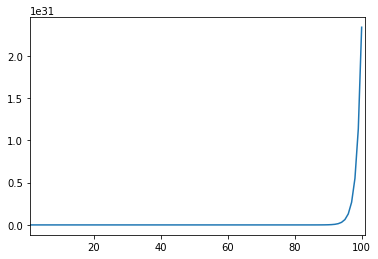

In [7]:
#3
def part(N,T,h): #return the partition function by eigenvalues**N
    A=Tran_matrix(T,h)
    x,y=np.linalg.eig(A)

    return x[0]**N+x[1]**N
y=[]
x=[]
for i in range(100):    
    y.append(part(i+1,10,2))
    x.append(i+1)
plt.xlim(1,101)

plt.plot(x,y)
#partition function with different size

In [7]:
#direct calculate partition (same with eigenvalue)
def par(N,T,h):
    A=Tran_matrix(T,h)
    B=np.eye(2)
    for i in range(N):
        if i==0:
            pass
        B=B@A
    return B[0,0]+B[1,1]
par(100,2,1)

2.5196958965332103e+46

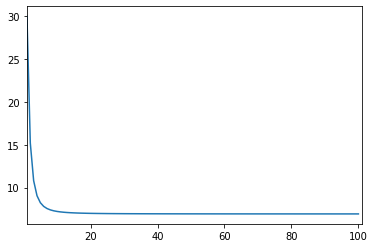

In [24]:
x=[]
y=[]
for i in range(100):    
    y.append(np.log(part(10,i+1,2)))
    x.append(i+1)
plt.xlim(1,101)

plt.plot(x,y)
#partition function with different temperature

C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


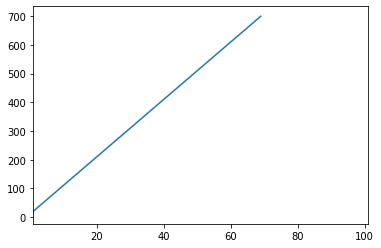

In [17]:
x=[]
y=[]
for i in range(100):    
    y.append(np.log(part(10,1,i)))
    x.append(i)
plt.xlim(1,101)
plt.plot(x,y)
#partition function with different external field

In [21]:
#4 correlation function

def imp_matrix():
    return np.array([[1,0],
                    [0,-1]])
def cor(i,j,N,T,h):
    A=Tran_matrix(T,h)
    S=imp_matrix()
    B=np.eye(2)
    for k in range(N):
        if k==0:
            pass
        if i==j:
            B=B@A       
        else:
            if k== i or k==j:
                B=B@S@A
                
            else:
                B=B@A
                
    a=B[0,0]+B[1,1]
    
    return a/part(N,T,h)
        
print(cor(0,0,100,50,1),cor(0,1,100,50,1),cor(0,50,100,50,1),cor(0,100,100,50,1))

0.9999999999999996 0.020413536678456426 0.0004331848750037507 0.020813093835462534


In [19]:
#5 plot the result
def cor_plt(N,T,h):
    x=[]
    y=[]
    for i in range(int(N/2)):
        y.append(cor(0,i,N,T,h))
        x.append(i)
    return x,y

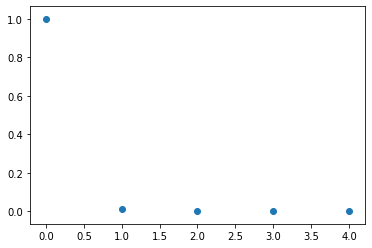

In [25]:
x,N10=cor_plt(10,100,1)
plt.scatter(x,N10)

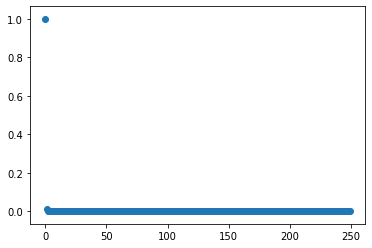

In [26]:
x,N500=cor_plt(500,100,1)
plt.scatter(x,N500)

C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in matmul
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


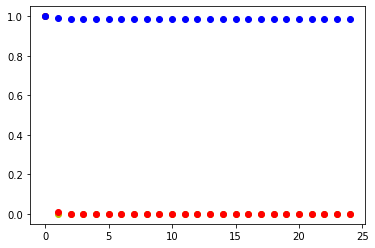

In [29]:
x,T1000=cor_plt(50,1000,1)
x,T100=cor_plt(50,100,1)
x,T1=cor_plt(50,1,1)
x,T50e_1=cor_plt(50,0.5,1) 
x,T10e_1=cor_plt(50,0.13,1) #limit temperature (show erro message ) 
plt.plot(x,T1000,'yo',x,T100,'ro',x,T1,'bo',x,T10e_1,'o')